# 🧩 Estudio de caso – Clasificación de conectividad

En este ejercicio implementaremos el algoritmo K-Nearest Neighbors (KNN) para predecir si una persona tiene alta conectividad a partir de variables como edad, ingreso, nivel educativo y ciudad.

El dataset ha sido previamente limpiado y transformado, y contiene la variable objetivo `Alta_conectividad` (1 si la persona usa más de 3.5 horas diarias de internet, 0 en caso contrario).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos limpios
df = pd.read_csv('../../datos/dataset_limpio.csv')

### 🎯 Separar variables predictoras y objetivo

In [2]:
X = df.drop(columns=['ID', 'CodigoID', 'Horas_Internet', 'Alta_conectividad'])
y = df['Alta_conectividad']

## 🧾 Selección de variables para el modelo

```python
X = df.drop(columns=['ID', 'CodigoID', 'Horas_Internet', 'Alta_conectividad'])
y = df['Alta_conectividad']
```

### ¿Qué hace este bloque?

1. **`X = df.drop(...)`**
   - Se crea el conjunto de **variables predictoras** (`X`) eliminando algunas columnas del DataFrame original `df`.
   - Las columnas eliminadas son:
     - `'ID'` y `'CodigoID'`: identificadores únicos que no aportan valor predictivo.
     - `'Horas_Internet'`: ya se usó para construir la variable objetivo.
     - `'Alta_conectividad'`: esta es precisamente la **variable objetivo** que queremos predecir, así que no debe estar en `X`.

2. **`y = df['Alta_conectividad']`**
   - Se define la **variable objetivo** (`y`) que queremos que el modelo prediga.
   - Esta variable indica si una persona tiene alta conectividad a internet (1) o no (0).

---

📌 En resumen:

- `X` contiene todas las variables que el modelo usará como entrada.
- `y` es la salida esperada que el modelo debe aprender a predecir.


### 🔀 División en entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 🔀 División del conjunto de datos en entrenamiento y prueba

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

### ¿Qué hace este bloque?

Este comando divide el conjunto de datos (`X` y `y`) en dos subconjuntos:

- `X_train`, `y_train`: para **entrenar** el modelo (70% de los datos).
- `X_test`, `y_test`: para **evaluar** el modelo (30% de los datos).

---

### ⚙️ Parámetros clave

- `test_size=0.3`:  
  Indica que el 30% de los datos se utilizarán para prueba y el 70% restante para entrenamiento.

- `random_state=42`:  
  Fija la "semilla" aleatoria para que la división sea reproducible (los mismos datos se dividen igual cada vez que se corre el código).

---

📌 **¿Por qué se divide así?**

Separar los datos en entrenamiento y prueba permite:

- Evaluar el rendimiento del modelo sobre datos **no vistos durante el entrenamiento**.
- Evitar sobreajuste (overfitting), asegurando que el modelo generalice bien a nuevos casos.



### 🏷️ Codificación de variables categóricas

In [4]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas en caso de que falte alguna categoría en test o train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### ¿Qué hace este bloque?

#### 🔸 `pd.get_dummies(...)`
- Convierte variables categóricas (como `'Genero'`, `'Ciudad'`, `'Nivel_Educativo'`) en variables numéricas binarias (**one-hot encoding**).
- Por ejemplo, la columna `'Ciudad'` con valores como `'Bogotá'`, `'Cali'`, `'Medellín'` se convierte en varias columnas:
  - `'Ciudad_Cali'`, `'Ciudad_Medellín'`, etc. (cada una vale 1 o 0).

- `drop_first=True` elimina la primera categoría de cada variable para **evitar colinealidad** (redundancia estadística).

#### 🔸 Alineación con `.align(...)`
- Después de la codificación, puede ocurrir que `X_train` y `X_test` tengan **columnas distintas**, por ejemplo, si una categoría aparece solo en el entrenamiento.
- `X_train.align(X_test, ...)` ajusta ambos DataFrames para que tengan exactamente las **mismas columnas**:
  - `join='left'`: conserva las columnas de `X_train`.
  - `fill_value=0`: si alguna columna falta en `X_test`, se rellena con ceros.

---

📌 **¿Por qué es importante hacer esto?**

- Los modelos de machine learning **solo aceptan variables numéricas**.
- Todos los datos (train y test) deben tener exactamente la **misma estructura** de variables.
- Esta codificación permite al modelo **interpretar correctamente categorías** y evita errores de forma.



### 📏 Escalado de variables numéricas

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ¿Qué hace este bloque?

Este código aplica **escalado Min-Max** a las variables numéricas del conjunto de datos.

#### 🔸 `MinMaxScaler()`
- Es un método de normalización que transforma los valores numéricos para que estén en el rango **[0, 1]**.
- Usa la siguiente fórmula:

$$
X_{\text{escalado}} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

Esto hace que la variable más pequeña valga 0 y la más grande valga 1.

---

### 🧪 Aplicación

- `scaler.fit_transform(X_train)`:  
  Ajusta el escalador con los datos de entrenamiento y los transforma.

- `scaler.transform(X_test)`:  
  Aplica la misma transformación al conjunto de prueba (usando los parámetros del entrenamiento).

---

### 🧠 ¿Por qué es importante escalar?

- Algoritmos como **KNN** y **regresión logística** se basan en distancias o magnitudes.
- Si una variable (por ejemplo, ingreso) tiene valores mucho mayores que otra (como edad), dominará el resultado.
- Escalar pone todas las variables en **la misma escala**, evitando sesgos y mejorando el rendimiento del modelo.



### 🤖 Entrenamiento y predicción con KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## 🤖 Entrenamiento y predicción con el modelo KNN

```python
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

### ¿Qué hace este bloque?

#### 🔸 `knn = KNeighborsClassifier(n_neighbors=5)`
- Crea una instancia del modelo **K-Nearest Neighbors** (KNN) con `k = 5`.
- Esto significa que para clasificar una nueva observación, el modelo buscará los **5 puntos más cercanos** en el conjunto de entrenamiento y asignará la clase más común entre ellos.
- Es un modelo **no paramétrico** y **perezoso**: no construye una función explícita, sino que almacena los datos y calcula las predicciones al momento.

---

#### 🔸 `knn.fit(X_train, y_train)`
- “Entrena” el modelo con los datos de entrenamiento.
- En el caso de KNN, esto simplemente implica **almacenar los datos de entrenamiento**, ya que no hay un proceso de ajuste de parámetros como en otros modelos.

---

#### 🔸 `y_pred = knn.predict(X_test)`
- Utiliza el modelo para **predecir** la clase (`0` o `1`) de cada observación del conjunto de prueba (`X_test`).
- Para cada caso, busca sus 5 vecinos más cercanos en `X_train` y asigna la clase más frecuente.

---

### 📌 ¿Por qué es útil?

- Este modelo permite clasificar nuevos casos basándose en la similitud con datos conocidos.
- Es simple y funciona bien con datos bien preparados (escalados, sin ruido, sin outliers).



### 📊 Evaluación del modelo

In [7]:
print("Exactitud:", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

Exactitud: 0.6872
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       311
           1       0.16      0.13      0.14        79

    accuracy                           0.69       390
   macro avg       0.47      0.48      0.47       390
weighted avg       0.66      0.69      0.67       390



### ¿Qué hace este bloque?

#### 🔸 `accuracy_score(y_test, y_pred)`
- Calcula la **exactitud** del modelo, es decir, la proporción de predicciones correctas sobre el total de observaciones.
- Se compara la predicción del modelo (`y_pred`) con los valores reales (`y_test`).
- Se redondea a 4 decimales para una presentación más clara.

#### 🔸 Ejemplo:
Si el modelo acertó en 268 de 390 casos:
\[
\text{Exactitud} = \frac{268}{390} = 0.6872
\]

---

#### 🔸 `classification_report(y_test, y_pred)`
- Muestra un informe detallado de métricas de rendimiento para cada clase (en este caso: 0 = baja conectividad, 1 = alta conectividad).
- Incluye:
  - **Precision**: de todas las predicciones positivas, ¿cuántas fueron correctas?
  - **Recall**: de todos los casos positivos reales, ¿cuántos fueron detectados?
  - **F1-score**: media armónica entre precision y recall (balance entre ambos).
  - **Support**: cantidad de observaciones por clase en los datos de prueba.

---

### 📌 ¿Por qué es importante?

- La **exactitud sola no basta** cuando las clases están desbalanceadas.
- El `classification_report` permite evaluar el desempeño **por clase**, lo cual es crucial si te interesa una clase en particular (por ejemplo, identificar a personas con alta conectividad).



# 📊 Evaluación del Modelo - Resultados y Análisis

## ✅ Exactitud del Modelo

- **Exactitud (accuracy):** 0.6872  
- El modelo acertó en el **68.72%** de los casos totales.

---

## 📋 Métricas por Clase

| Métrica      | Clase 0 (Baja Conectividad) | Clase 1 (Alta Conectividad) |
|--------------|------------------------------|-------------------------------|
| Precision    | 0.79                         | 0.16                          |
| Recall       | 0.83                         | 0.13                          |
| F1-score     | 0.81                         | 0.14                          |
| Support (# casos) | 311                   | 79                            |

---

## 🧠 Interpretación

### Clase 0: Baja Conectividad
- **Muy bien clasificada.**
- Alta precisión y recall.
- La mayoría de los datos pertenecen a esta clase.

### Clase 1: Alta Conectividad
- **Muy mal clasificada.**
- Solo el 13% de los verdaderos positivos son detectados.
- Solo el 16% de las predicciones positivas fueron correctas.

---

## 🧮 Promedios Globales

| Tipo de Promedio  | Precision | Recall | F1-score | ¿Qué significa? |
|-------------------|-----------|--------|----------|------------------|
| Macro Avg         | 0.47      | 0.48   | 0.47     | Promedio simple entre clases. No pondera. |
| Weighted Avg      | 0.66      | 0.69   | 0.67     | Ponderado según la cantidad de ejemplos por clase. |

---

## 🎯 Contexto del Proyecto

- Fundación que busca mejorar el **acceso a internet** en comunidades vulnerables.
- Se desea **identificar personas con alta conectividad** (más de 3.5 horas de uso diario de internet).
- Usar el modelo para guiar decisiones de inversión, focalización y políticas públicas.

---

## 📉 Análisis del Resultado

- Aunque el modelo tiene un buen desempeño general, **falla en su objetivo central**: detectar a quienes tienen buena conectividad.
- El modelo **ignora a la mayoría de los casos positivos**, lo que lo hace poco útil en términos prácticos.

---

## ⚠️ Implicaciones Prácticas

- No se puede confiar en este modelo para tomar decisiones sobre intervenciones o focalización.
- Puede perpetuar desigualdades si los datos están sesgados o incompletos.

---

## 🛠️ ¿Cómo Mejorar?

1. **Abordar el desbalance de clases:**
   - Usar técnicas como SMOTE, undersampling, o pesos balanceados (`class_weight='balanced'`).

2. **Probar otros modelos más robustos:**
   - Random Forest, Gradient Boosting, etc.

3. **Mejorar la ingeniería de variables:**
   - Combinaciones de Edad-Ingreso.
   - Mejor codificación de variables categóricas.

4. **Evaluar nuevas métricas:**
   - Curva ROC-AUC  
   - Matriz de confusión  
   - Recall por clase  

---

## 📌 Conclusión

Aunque el modelo alcanza una exactitud razonable, **no cumple con el objetivo real del análisis**, que es detectar correctamente los casos de alta conectividad. Se requiere **una revisión profunda de los datos, el modelo y las métricas utilizadas** antes de avanzar hacia su uso práctico.


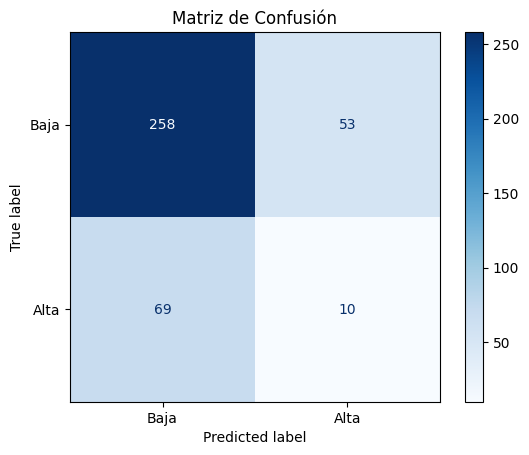

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión")
plt.show()


## 🧮 Visualización: Matriz de Confusión

### 📌 ¿Qué hace este bloque de código?

#### 1. `confusion_matrix(y_test, y_pred)`
- Calcula la **matriz de confusión**, una tabla que compara las predicciones del modelo (`y_pred`) con los valores reales (`y_test`).
- Muestra cuántas veces el modelo acertó o se equivocó, desglosado por clase.
- La matriz tiene esta forma:

|                       | Predicho: Baja | Predicho: Alta |
|-----------------------|----------------|----------------|
| **Real: Baja**        | Verdaderos Negativos (TN) | Falsos Positivos (FP) |
| **Real: Alta**        | Falsos Negativos (FN)     | Verdaderos Positivos (TP) |

#### 2. `ConfusionMatrixDisplay(...)`
- Crea un objeto gráfico para mostrar la matriz de confusión.
- `display_labels=["Baja", "Alta"]` pone etiquetas legibles para las clases (en vez de 0 y 1).

#### 3. `disp.plot(...)`
- Genera la gráfica usando una paleta de color azul (`cmap="Blues"`).
- `values_format="d"` muestra los valores como enteros.

#### 4. `plt.title(...)` y `plt.show()`
- Añade un título al gráfico.
- Muestra la visualización en pantalla.

---

### 🧠 ¿Para qué sirve una matriz de confusión?

- Es una herramienta clave para evaluar modelos de clasificación.
- Permite ver exactamente cuántas predicciones fueron correctas y cuántas no, separadas por clase.
- Es más informativa que solo ver la exactitud general del modelo.

---

### ✅ Interpretación práctica

- Ideal para entender si el modelo está **confundiendo una clase con otra**, por ejemplo, si clasifica muchos casos de alta conectividad como baja.
- Útil para ajustar el modelo, cambiar el umbral de decisión o aplicar estrategias de rebalanceo.



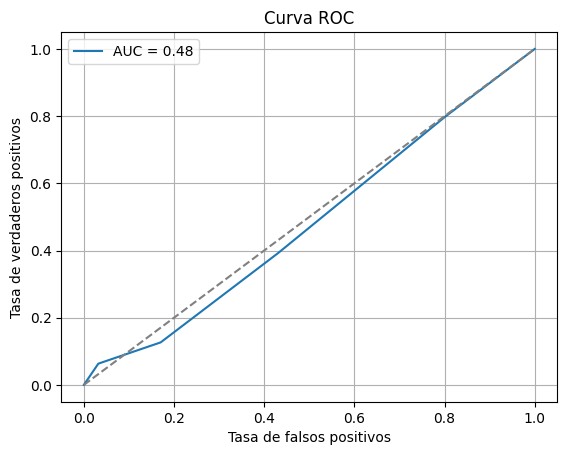

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


## 📈 Visualización: Curva ROC y AUC
### 📌 ¿Qué hace este bloque?

#### 🔹 `knn.predict_proba(X_test)[:, 1]`
- Obtiene las **probabilidades predichas** de que cada observación pertenezca a la clase 1 (alta conectividad).
- El resultado es una lista de valores entre 0 y 1.

#### 🔹 `roc_curve(y_test, y_prob)`
- Calcula los valores para trazar la curva ROC:
  - **FPR (false positive rate)**: proporción de negativos mal clasificados como positivos.
  - **TPR (true positive rate)**: proporción de positivos correctamente clasificados (recall).

#### 🔹 `roc_auc_score(y_test, y_prob)`
- Calcula el área bajo la curva ROC (**AUC**).
- Cuanto más cerca de 1, mejor el modelo. Un valor cercano a 0.5 indica un modelo aleatorio.

---

### 📈 ¿Qué es la Curva ROC?

- Muestra el equilibrio entre **sensibilidad (recall)** y **especificidad** para todos los posibles umbrales de decisión.
- Ayuda a entender cómo se comporta el modelo más allá del umbral predeterminado (por ejemplo, 0.5).

---

### ✅ ¿Por qué es útil?

- Es especialmente útil cuando las clases están desbalanceadas.
- Permite comparar distintos modelos independientemente del umbral de clasificación.
- El AUC es una métrica robusta que resume el rendimiento del modelo:  
  - **AUC ≈ 1.0**: modelo perfecto  
  - **AUC ≈ 0.5**: modelo aleatorio



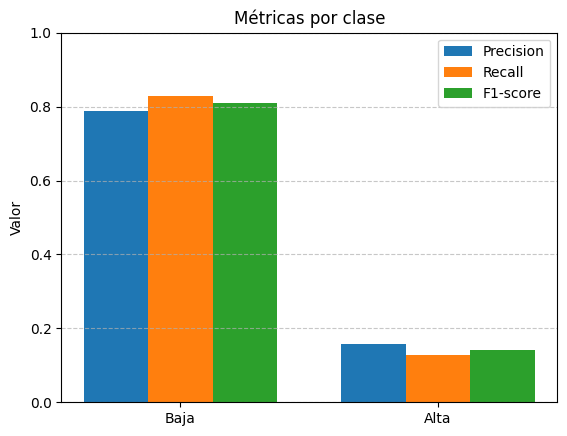

In [10]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
labels = ["Baja", "Alta"]
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, metrics[0], width, label='Precision')
ax.bar(x, metrics[1], width, label='Recall')
ax.bar(x + width, metrics[2], width, label='F1-score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Valor")
ax.set_title("Métricas por clase")
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 📊 Visualización: Gráfico de barras de métricas por clase
### 📌 ¿Qué hace este bloque?

#### 🔹 `precision_recall_fscore_support(...)`
- Calcula las tres métricas más importantes para cada clase:
  - **Precision**: ¿De todas las veces que el modelo predijo una clase, cuántas fueron correctas?
  - **Recall**: ¿De todos los casos reales de una clase, cuántos fueron detectados correctamente?
  - **F1-score**: Media armónica entre precisión y recall (balance entre ambos).

#### 🔹 `bar(...)`
- Se genera un gráfico de barras con las tres métricas por cada clase (`Baja`, `Alta`).
- Cada grupo de barras representa una clase, y cada barra dentro del grupo una métrica.

---

### 🎯 ¿Para qué sirve?

- Permite **comparar visualmente** el rendimiento del modelo para cada clase.
- Ideal para detectar si el modelo está **sesgado hacia una sola clase**.
- Útil cuando se presentan los resultados a una audiencia no técnica (más fácil de entender que tablas).

---

### ✅ Interpretación

- Altura de cada barra: valor de la métrica entre 0 y 1.
- Una clase con barras bajas indica que el modelo **tiene dificultades para identificarla correctamente**.
- Idealmente, todas las barras estarían por encima de 0.7 para ambos grupos.



## ✅ Conclusión general del análisis visual

Tras entrenar el modelo KNN y analizar sus resultados tanto numéricos como visuales, podemos concluir lo siguiente:

- La **exactitud global** del modelo es aceptable (≈ 69%), pero esto **esconde un problema importante**:  
  el modelo **funciona bien para la clase mayoritaria** (baja conectividad), pero **tiene bajo rendimiento para detectar a personas con alta conectividad**.

- La **matriz de confusión** muestra un fuerte desequilibrio: muchos verdaderos negativos (bien clasificados como baja conectividad) y pocos verdaderos positivos.

- La **curva ROC** y su AUC reflejan que el modelo tiene una capacidad limitada de distinguir entre ambas clases. Si el AUC está cercano a 0.5, el modelo no está aprendiendo patrones claros.

- El **gráfico de barras** revela que las métricas de `precision`, `recall` y `f1-score` para la clase minoritaria (alta conectividad) son muy bajas, lo que confirma el sesgo del modelo.

---

### 🛠️ Recomendaciones

- Es importante **no confiar únicamente en la exactitud general**, sino observar el comportamiento por clase usando varias métricas.

- Se deben aplicar estrategias como:
  - **Rebalanceo de clases** (SMOTE, undersampling, etc.).
  - **Mejor selección o creación de variables predictoras.**
  - **Prueba con otros algoritmos** más robustos frente a desbalance (Random Forest, XGBoost, etc.).

---

El modelo actual es un buen punto de partida, pero **requiere ajustes para ser útil en la práctica** y para apoyar decisiones basadas en la detección de alta conectividad en poblaciones vulnerables.
